# Praxisteil 0: Posterior Sampling from Scratch

In [160]:
import pandas as pd
import numpy as np
import arviz as az
import pymc3 as pm
import scipy

import matplotlib.pyplot as plt

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [7]:
df = pd.read_csv('../data/dataset_sim_normalmodel.csv')
df.head()

,height
0,170.414526
1,182.146265
2,183.708331
3,184.754210
4,187.548022


## Walkthrough one sample

### Prior distribution

In [26]:
prior_mu_mu = 170
prior_mu_sigma = 30

prior_mu_draw = np.random.normal(loc=prior_mu_mu,scale=prior_mu_sigma,size=1)
prior_mu_draw

array([143.25435656])

### Likelihood

In [25]:
scipy.stats.norm.pdf(x=3, loc=3, scale=1)

0.3989422804014327

<AxesSubplot:>

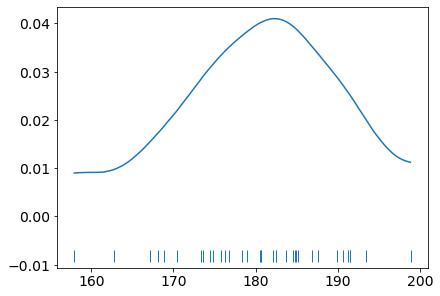

In [69]:
az.plot_kde(df.height,rug=True)

In [75]:
likelihoods = scipy.stats.norm.pdf(x=df.height, loc=160, scale=20)
likelihoods

array([0.01741804, 0.01080504, 0.00987966, 0.00927313, 0.00772504,
       0.01406801, 0.00907085, 0.0116806 , 0.018112  , 0.01871073,
       0.01537439, 0.01585968, 0.00301479, 0.0065034 , 0.0131051 ,
       0.00914627, 0.00616641, 0.01270435, 0.01461114, 0.01058871,
       0.00935881, 0.01513975, 0.00578231, 0.01174287, 0.0116741 ,
       0.00808111, 0.00493449, 0.0105855 , 0.01596775, 0.00586967,
       0.00576308, 0.01975867, 0.01838756, 0.01983503, 0.01435893])

In [76]:
loglikelihood = np.sum(np.log(likelihoods))
np.exp(loglikelihood)

1.238215101547214e-69

### Posterior distribution

In [142]:
# Number of samples to draw
num_samples = 1000

# Preallocate list
posterior_probability = []
prior_mus = []

for i in range(num_samples):
    # Fixed sigma (for simplicity)
    prior_sigma = 20

    # draw one mu from prior distribution
    prior_mu_draw = np.random.normal(loc=prior_mu_mu,scale=prior_mu_sigma,size=1)

    # evaluate mu based on the data
    #loglikelihood = np.sum(np.log(scipy.stats.norm.pdf(x=df.height, loc=170, scale=prior_sigma)))
    likelihood = np.prod(scipy.stats.norm.pdf(x=df.height, loc=prior_mu_draw, scale=prior_sigma))
    
    # Probability of prior mu
    prob_prior_draw = scipy.stats.norm.pdf(x=prior_mu_draw, loc=prior_mu_mu, scale=prior_mu_sigma)

    # Posterior is proportional to prior times likelihood
    prob_posterior_draw = prob_prior_draw * likelihood
    
    # store 
    prior_mus.append(prior_mu_draw)
    posterior_probability.append(float(prob_posterior_draw))

    print(str(prior_mu_draw) + ': ' + str(prob_posterior_draw))

[173.14014202]: [1.20149771e-64]
[271.94921824]: [1.0615562e-225]
[162.26134743]: [7.09704458e-70]
[235.60627995]: [8.8218242e-123]
[189.13356196]: [3.14010104e-65]
[158.90945115]: [2.1001074e-72]
[242.16367505]: [1.3609997e-137]
[187.80694952]: [8.31135529e-65]
[203.42375814]: [4.45892629e-74]
[178.46028346]: [9.51633637e-64]
[142.19616169]: [1.82020193e-91]
[135.71476449]: [9.44435774e-102]
[181.16967686]: [1.0412857e-63]
[127.40658444]: [2.67363861e-117]
[163.21521746]: [3.10238691e-69]
[93.19769334]: [2.64084479e-209]
[192.34648975]: [1.55773212e-66]
[104.15417299]: [6.18675632e-175]
[194.20880321]: [1.79690893e-67]
[191.00420901]: [6.10624441e-66]
[175.12826625]: [3.49179052e-64]
[88.96588776]: [8.13064722e-224]
[168.87200032]: [3.7260178e-66]
[146.56801353]: [1.92557305e-85]
[169.24749552]: [5.39610204e-66]
[134.58924591]: [1.0578195e-103]
[203.29057782]: [5.8609394e-74]
[225.25840411]: [8.97635885e-103]
[147.76034263]: [6.30872653e-84]
[153.54768443]: [2.38823814e-77]
[190.10488

[124.71372429]: [6.57080221e-123]
[175.3296813]: [3.81506155e-64]
[113.52726611]: [3.37048284e-149]
[189.72965059]: [1.92728386e-65]
[212.76325285]: [4.17150646e-84]
[210.88004451]: [8.17911497e-82]
[124.67861868]: [5.52900944e-123]
[136.31893977]: [1.00514157e-100]
[151.73708498]: [2.87487961e-79]
[193.98632168]: [2.3637436e-67]
[163.35246652]: [3.81057749e-69]
[162.08354881]: [5.34313947e-70]
[158.28871084]: [6.40434779e-73]
[160.07592182]: [1.78375854e-71]
[151.97167172]: [5.18112782e-79]
[166.22331024]: [1.91693664e-67]
[135.92010516]: [2.11744791e-101]
[206.88806657]: [2.09324693e-77]
[105.08278348]: [3.10518264e-172]
[138.09529633]: [8.72046776e-98]
[112.64367758]: [1.76160871e-151]
[129.88009647]: [2.15661798e-112]
[132.62841819]: [3.23174728e-107]
[185.44079496]: [3.20276916e-64]
[207.5602611]: [4.18304763e-78]
[169.3953719]: [6.22200856e-66]
[152.40920211]: [1.53415777e-78]
[160.66175211]: [4.9911163e-71]
[110.49734635]: [3.78514291e-157]
[197.94914026]: [9.27802978e-70]
[191.

[164.37496305]: [1.67268449e-68]
[183.29254176]: [7.09284156e-64]
[169.19473213]: [5.12634413e-66]
[162.16906758]: [6.1269578e-70]
[209.23708599]: [6.32691607e-80]
[146.67511949]: [2.64802485e-85]
[140.50593418]: [5.41775466e-94]
[165.43467115]: [7.02683253e-68]
[174.67622564]: [2.82528724e-64]
[178.62870732]: [9.75292807e-64]
[146.62796089]: [2.30173777e-85]
[123.06118441]: [1.72602473e-126]
[180.29492945]: [1.08599083e-63]
[179.61086523]: [1.0704956e-63]
[211.59809857]: [1.13428886e-82]
[161.25559066]: [1.37305669e-70]
[126.80424542]: [1.57254207e-118]
[205.73398996]: [3.02640141e-76]
[142.62861378]: [7.74143547e-91]
[188.36578093]: [5.6215323e-65]
[219.3533321]: [3.34040141e-93]
[134.38674715]: [4.65869242e-104]
[120.82055921]: [1.63839683e-131]
[204.84853965]: [2.16897404e-75]
[195.97592941]: [1.74217292e-68]
[141.69928024]: [3.37959448e-92]
[159.95472503]: [1.43628412e-71]
[195.67123829]: [2.65707276e-68]
[194.8825701]: [7.62605786e-68]
[185.75891196]: [2.74977352e-64]
[203.478271

In [173]:
norm_const = np.sum(np.array(posterior_probability)*np.array(prior_mus))

(100.0, 250.0)

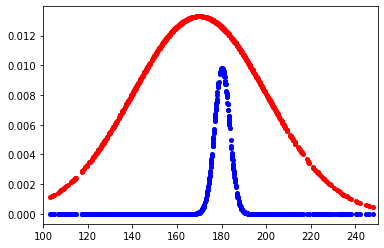

In [175]:
plt.plot(prior_mus,scipy.stats.norm.pdf(x=prior_mus, loc=prior_mu_mu, scale=prior_mu_sigma), color='red', marker='o',markersize=4,linewidth=0)
plt.plot(prior_mus,posterior_probability/np.sum(posterior_probability), color='blue', marker='o',markersize=4,linewidth=0)
plt.xlim([100, 250])

## With pymc3 

In [161]:
with pm.Model() as normal_model:
    
    mu = pm.Normal('mu', mu=170, sigma=30)
    
    y = pm.Normal('y',mu=mu,sigma=20,observed=df.height)

In [163]:
with normal_model:
    # Sample from the model
    trace_nm = pm.sample(**{'chains': 4,'cores': 4})

/opt/conda/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'mu'}>

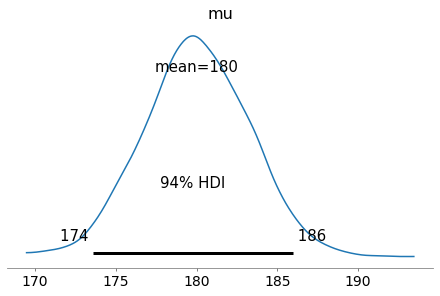

In [164]:
az.plot_posterior(trace_nm, var_names=['mu'])

In [167]:
trace_nm['mu']

array([173.81781713, 175.02334734, 186.22608117, ..., 183.58988867,
       185.89553595, 176.03083414])

(100.0, 250.0)

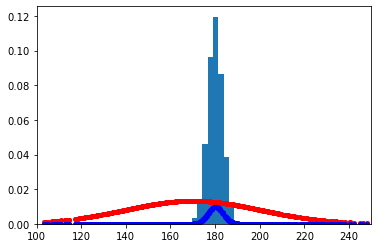

In [170]:
plt.plot(prior_mus,scipy.stats.norm.pdf(x=prior_mus, loc=prior_mu_mu, scale=prior_mu_sigma), color='red', marker='o',markersize=4,linewidth=0)
plt.plot(prior_mus,posterior_probability/np.sum(posterior_probability), color='blue', marker='o',markersize=4,linewidth=0)
plt.hist(trace_nm['mu'],density=True)
plt.xlim([100, 250])